<a href="https://colab.research.google.com/github/seupedro7/Trainee-CIS/blob/main/Trainee_CIS_Parte5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Trainee CIS - Parte 5
Redes neurais convolucionais


In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importando o dataset de imagens atraves do Image data generator e flow_from_directory

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/animals/train",
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=38,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/animals/test",
    target_size=(100,100),
    color_mode="rgb",
    batch_size=38,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

train_generator

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


##Montando os parametros da rede neural

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')

    
])



In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0


##Treinando a rede



In [ ]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=20,
                    verbose = 2)

Epoch 1/20
64/64 - 949s - loss: 0.9547 - accuracy: 0.4938 - val_loss: 1.0291 - val_accuracy: 0.5400 - 949s/epoch - 15s/step
Epoch 2/20
64/64 - 60s - loss: 0.7751 - accuracy: 0.5896 - val_loss: 0.7600 - val_accuracy: 0.6417 - 60s/epoch - 937ms/step
Epoch 3/20
64/64 - 60s - loss: 0.7143 - accuracy: 0.6321 - val_loss: 0.9698 - val_accuracy: 0.5550 - 60s/epoch - 937ms/step
Epoch 4/20
64/64 - 60s - loss: 0.7124 - accuracy: 0.6363 - val_loss: 0.6551 - val_accuracy: 0.6900 - 60s/epoch - 933ms/step
Epoch 5/20
64/64 - 60s - loss: 0.6720 - accuracy: 0.6521 - val_loss: 1.0090 - val_accuracy: 0.5500 - 60s/epoch - 939ms/step
Epoch 6/20
64/64 - 61s - loss: 0.6576 - accuracy: 0.6717 - val_loss: 0.7674 - val_accuracy: 0.6150 - 61s/epoch - 946ms/step
Epoch 7/20
64/64 - 61s - loss: 0.6169 - accuracy: 0.7008 - val_loss: 0.6176 - val_accuracy: 0.7067 - 61s/epoch - 946ms/step
Epoch 8/20
64/64 - 60s - loss: 0.6060 - accuracy: 0.7063 - val_loss: 0.6587 - val_accuracy: 0.6983 - 60s/epoch - 938ms/step
Epoch 9/

##Plotando os resultados

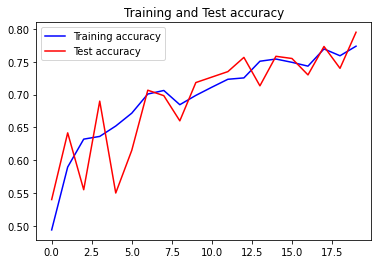

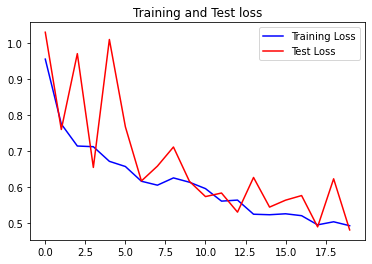

In [ ]:

def plot_result(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Test accuracy')
    plt.title('Training and Test accuracy')
    plt.legend()
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Test Loss')
    plt.title('Training and Test loss')
    plt.legend()
    plt.show()
plot_result(history)